<a href="https://colab.research.google.com/github/Pontessxx/OceansGate-GS-DataScience/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importando as bibliotecas

usarei pandas seaborn matplotlib e geopandas

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd

In [2]:
from warnings import filterwarnings
filterwarnings(action='ignore', category=FutureWarning)

## Importando os dados

In [3]:
cities_data = pd.read_csv('https://raw.githubusercontent.com/Pontessxx/OceansGate-GS-DataScience/main/Cities1.csv')
who_pm_data = pd.read_csv('https://raw.githubusercontent.com/Pontessxx/OceansGate-GS-DataScience/main/WHO_PM.csv')

# Analise dos dados <p style='color: gray;'>cities_data</p>

In [4]:
display(cities_data)

,City,Region,Country,AirQuality,WaterPollution
0,New York City,New York,United States of America,46.816038,49.504950
1,"Washington, D.C.",District of Columbia,United States of America,66.129032,49.107143
2,San Francisco,California,United States of America,60.514019,43.000000
3,Berlin,NaN,Germany,62.364130,28.612717
4,Los Angeles,California,United States of America,36.621622,61.299435
...,...,...,...,...,...
3958,Yanbu,Medina Province,Saudi Arabia,0.000000,50.000000
3959,Cordoba,Andalusia,Spain,85.714286,8.333333
3960,Vic,Catalonia,Spain,100.000000,0.000000
3961,Segovia,Castile and Leon,Spain,100.000000,0.000000


### sobre as colunas e seus dados

In [5]:
# Verificar a estrutura e os tipos de dados
print("\nEstrutura do Cities1.csv:")
print(cities_data.info())



Estrutura do Cities1.csv:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3963 entries, 0 to 3962
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   City            3963 non-null   object 
 1   Region          3538 non-null   object 
 2   Country         3963 non-null   object 
 3   AirQuality      3963 non-null   float64
 4   WaterPollution  3963 non-null   float64
dtypes: float64(2), object(3)
memory usage: 154.9+ KB
None


podemos ver que temos 3 colunas de strings(object) e 2 colunas de float as quais possuem o nome de "Qualidade do Ar" e "Poluição da agua"

In [6]:
# Verificar valores nulos
print("\nValores nulos no Cities1.csv:")
print(cities_data.isnull().sum())


Valores nulos no Cities1.csv:
City                0
Region            425
Country             0
AirQuality          0
WaterPollution      0
dtype: int64


Nos valores nulos observamos 425 linhas, filtrei o dataframe para observar as cidades que possuem Região em valores nulos

In [19]:
cities_data[cities_data['Region'].isna()]

,City,Region,Country,AirQuality,WaterPollution
3,Berlin,NaN,Germany,62.364130,28.612717
8,Basel,NaN,Switzerland,81.666667,26.923077
17,Vilnius,NaN,Lithuania,77.247191,20.588235
18,Monaco,NaN,Monaco,28.787879,61.363636
19,Brussels,NaN,Belgium,35.810811,44.761905
...,...,...,...,...,...
3896,Croton,NaN,Italy,62.500000,50.000000
3907,Dudelange,NaN,Luxembourg,66.666667,62.500000
3929,Siping,NaN,People's Republic of China,0.000000,50.000000
3944,Loures,NaN,Portugal,100.000000,50.000000


Aplicarei uma função para descrever as colunas e conseguir saber o desvio padrao, media, quantidade de valores, minimos e maximos e seus quartis

In [8]:
print("\nEstatísticas descritivas do Cities1.csv:")
print(cities_data.describe())


Estatísticas descritivas do Cities1.csv:
        AirQuality  WaterPollution
count  3963.000000     3963.000000
mean     62.253452       44.635372
std      30.944753       25.663910
min       0.000000        0.000000
25%      37.686567       25.000000
50%      69.444444       50.000000
75%      87.500000       57.719393
max     100.000000      100.000000


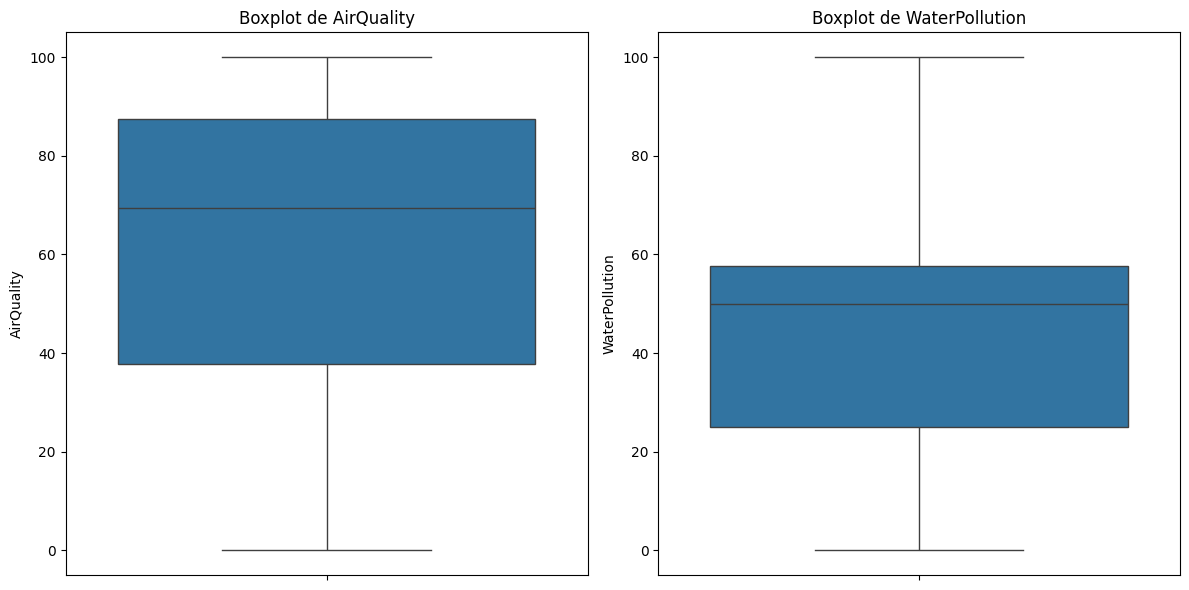

In [37]:
# Plotar boxplot para AirQuality e WaterPollution
plt.figure(figsize=(12, 6))

# Boxplot para AirQuality
plt.subplot(1, 2, 1)
sns.boxplot(y=cities_data['AirQuality'])
plt.title('Boxplot de AirQuality')
plt.ylabel('AirQuality')

# Boxplot para WaterPollution
plt.subplot(1, 2, 2)
sns.boxplot(y=cities_data['WaterPollution'])
plt.title('Boxplot de WaterPollution')
plt.ylabel('WaterPollution')

plt.tight_layout()
plt.show()

In [39]:
cities_data[['AirQuality','WaterPollution']].median()

AirQuality        69.444444
WaterPollution    50.000000
dtype: float64

### Conclusões através do boxplot
Com este plot podemos saber se há ou não outliers, estes são responsáveis por gerar modelos preditivos ou aprendizados de máquinas com 'overfit'. Traduzindo ao aplicar algum algoritimo estes outliers acabam influenciando e fazendo com que o modelo fique muito especifico e quando aplicado em testes acabam saindo mal por se restringirem e adequarem tanto aos dados de treino

## Criando um mapa para melhor visibilidade e compreenção dos dados

In [11]:
result_df = pd.read_csv('https://raw.githubusercontent.com/Pontessxx/OceansGate-GS-DataScience/main/locations.csv')

In [12]:
result_df

,City,latitude,longitude
0,New York City,40.71453,-74.00712
1,"Washington, D.C.",38.89037,-77.03196
2,San Francisco,37.77712,-122.41966
3,Berlin,52.51604,13.37691
4,Los Angeles,34.05357,-118.24545
...,...,...,...
3791,Jubail,27.01740,49.62251
3792,Yanbu,24.08954,38.06180
3793,Vic,23.73060,-99.15136
3794,Segovia,40.94847,-4.11648


In [13]:
df = cities_data.merge(right=result_df, on='City', how='inner')
df.head()

,City,Region,Country,AirQuality,WaterPollution,latitude,longitude
0,New York City,New York,United States of America,46.816038,49.504950,40.71453,-74.00712
1,"Washington, D.C.",District of Columbia,United States of America,66.129032,49.107143,38.89037,-77.03196
2,San Francisco,California,United States of America,60.514019,43.000000,37.77712,-122.41966
3,Berlin,NaN,Germany,62.364130,28.612717,52.51604,13.37691
4,Los Angeles,California,United States of America,36.621622,61.299435,34.05357,-118.24545


In [15]:
from plotly.express import scatter_mapbox
scatter_mapbox(height=900, mapbox_style='open-street-map', data_frame=df, lat='latitude', lon='longitude', hover_name='City', hover_data=['Country'], color='AirQuality', zoom=1,).show()

### Mapa da coluna 'WatterPoluction'

In [16]:
scatter_mapbox(height=900, mapbox_style='open-street-map', data_frame=df, lat='latitude', lon='longitude', hover_name='City', hover_data=['Country'], color='WaterPollution', zoom=1,).show()

## Considerações através do mapa
é possivel vizualizar que no mapa de qualidade do ar as cidades da america do norte e europa possuem valores considerados altos.
 Já no mapa de poluição da agua vemos que estes possuem maiores pontos com uma pontuação media

In [31]:

# 5 cidades com maior qualidade do ar
highest_air_quality_cities = cities_data.sort_values(by='AirQuality', ascending=False).head(5)
print("5 cidades com maior qualidade do ar:")
print(highest_air_quality_cities[['City', 'Country', 'AirQuality']])
print('\n')
# 5 cidades com maior poluição da água
highest_water_pollution_cities = cities_data.sort_values(by='WaterPollution', ascending=False).head(5)
print("\n5 cidades com maior poluição da água:")
print(highest_water_pollution_cities[['City', 'Country', 'WaterPollution']])


5 cidades com maior qualidade do ar:
                      City                   Country  AirQuality
3962           Zamora city                     Spain       100.0
3354          North Platte  United States of America       100.0
3337               Lebanon  United States of America       100.0
3344           East Orange  United States of America       100.0
3346  Sao Bras de Alportel                  Portugal       100.0



5 cidades com maior poluição da água:
              City      Country  WaterPollution
702          Pasay  Philippines           100.0
2761        Labasa         Fiji           100.0
1177  San Fernando  Philippines           100.0
406   Barquisimeto    Venezuela           100.0
3536        Kluang     Malaysia           100.0


# Matriz de correlação

Uma matriz de correlação é uma ferramenta estatística que nos permite visualizar as relações entre as variáveis de um conjunto de dados. Ela é especialmente útil quando trabalhamos com **dados numéricos**, pois nos ajuda a identificar **padrões e tendências**.

A matriz de correlação é uma tabela que mostra os coeficientes de correlação entre todas as combinações possíveis de variáveis. Esses coeficientes variam de -1 a 1 e indicam a força e a direção da relação entre as variáveis. Um coeficiente próximo de 1 indica uma correlação positiva forte, ou seja, quando uma variável aumenta, a outra também tende a aumentar. Por outro lado, um coeficiente próximo de -1 indica uma correlação negativa forte, ou seja, quando uma variável aumenta, a outra tende a diminuir. Um coeficiente próximo de 0 indica uma correlação fraca ou inexistente.

A matriz de correlação é frequentemente representada visualmente por meio de um mapa de calor, onde as células da tabela são coloridas de acordo com o valor do coeficiente de correlação. Isso facilita a identificação rápida das relações mais fortes e mais fracas entre as variáveis.

Ao analisar uma matriz de correlação, podemos obter insights valiosos sobre os dados. Por exemplo, podemos identificar variáveis altamente correlacionadas, o que pode indicar redundância ou multicolinearidade no conjunto de dados. Também podemos identificar variáveis que têm uma correlação forte com a variável de interesse, o que pode ser útil na construção de modelos preditivos.

No entanto, é importante lembrar que a correlação não implica causalidade. Ou seja, apenas porque duas variáveis estão correlacionadas, não significa necessariamente que uma causa a outra. É necessário realizar análises mais aprofundadas e considerar outros fatores antes de tirar conclusões definitivas.

Em resumo, a matriz de correlação é uma ferramenta poderosa para explorar e entender as relações entre as variáveis de um conjunto de dados. Ela nos ajuda a identificar padrões, tendências e possíveis problemas nos dados, permitindo uma análise mais precisa e informada.

In [40]:
# Matriz de Correlação
def matriz_correlacao(df):
    plt.figure(figsize=(10, 8))
    sns.heatmap(df.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
    plt.title(f'Matriz de Correlação')
    plt.show()

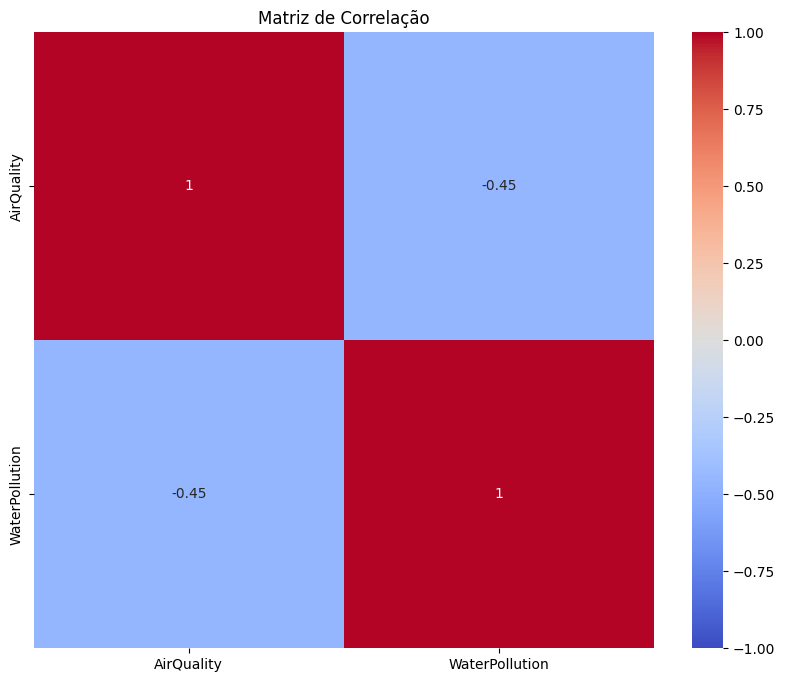

In [41]:
# Exibir matriz de correlação
matriz_correlacao(cities_data[['AirQuality','WaterPollution',]])

In [42]:
from scipy.stats import chi2_contingency

In [43]:
def teste_quiquadrado(df, col1, col2):
    contigencia = pd.crosstab(df[col1], df[col2])
    chi2, p, dof, ex = chi2_contingency(contigencia)
    print(f'Teste Qui-Quadrado entre {col1} e {col2}:')
    print(f'Chi2: {chi2}, p-value: {p}\n')